<a href="https://colab.research.google.com/github/u23ai105/rainfall_in_australia/blob/main/Copy_of_rainfall_in_australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install scikit-learn

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package")

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [4]:
import pandas as pd
rainfall_df=pd.read_csv("/content/weather-dataset-rattle-package/weatherAUS.csv")

In [5]:
raintomorrow_codes = {'No': 0, 'Yes': 1}
rainfall_df['raintomorrow_code']=rainfall_df.RainTomorrow.map(raintomorrow_codes)
rainfall_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        24.0   
145456       NaN         NNW           22.0         SE  ...        21.0   
145457       NaN           N           37.0         SE  ...        24.0   
145458       NaN          SE           28.0        SSE  ...        24.0   
145459       NaN         NaN            NaN        ESE  ...        36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow  raintomorrow_code  
0              No            No                0.0  
1              No            No                0.0  
2              No            No                0.0  
3              No            No                0.0  
4              No            No                0.0  
...           ...           ...                ...  
145455         No            No                0.0  
145456         No            No                0.0  
145457         No            No                0.0  
145458         No            No                0.0  
145459         No           NaN                NaN  

[145460 rows x 24 columns]

In [6]:
rainfall_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  \
count  89572.000000  86102.000000  143693.000000  141851.00000   
mean       4.447461      4.509930      16.990631      21.68339   
std        2.887159      2.720357       6.488753       6.93665   
min        0.000000      0.000000      -7.200000      -5.40000   
25%        1.000000      2.000000      12.300000      16.60000   
50%        5.000000      5.000000      16.700000      21.10000   
75%        7.000000      7.000000      21.600000      26.40000   
max        9.000000      9.000000      40.200000      46.70000   

       raintomorrow_code  
count      142193.000000  
mean            0.224181  
std             0.417043  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

In [7]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               145460 non-null  object 
 1   Location           145460 non-null  object 
 2   MinTemp            143975 non-null  float64
 3   MaxTemp            144199 non-null  float64
 4   Rainfall           142199 non-null  float64
 5   Evaporation        82670 non-null   float64
 6   Sunshine           75625 non-null   float64
 7   WindGustDir        135134 non-null  object 
 8   WindGustSpeed      135197 non-null  float64
 9   WindDir9am         134894 non-null  object 
 10  WindDir3pm         141232 non-null  object 
 11  WindSpeed9am       143693 non-null  float64
 12  WindSpeed3pm       142398 non-null  float64
 13  Humidity9am        142806 non-null  float64
 14  Humidity3pm        140953 non-null  float64
 15  Pressure9am        130395 non-null  float64
 16  Pr

In [8]:
rainfall_df.isnull().sum()

Date                     0
Location                 0
MinTemp               1485
MaxTemp               1261
Rainfall              3261
Evaporation          62790
Sunshine             69835
WindGustDir          10326
WindGustSpeed        10263
WindDir9am           10566
WindDir3pm            4228
WindSpeed9am          1767
WindSpeed3pm          3062
Humidity9am           2654
Humidity3pm           4507
Pressure9am          15065
Pressure3pm          15028
Cloud9am             55888
Cloud3pm             59358
Temp9am               1767
Temp3pm               3609
RainToday             3261
RainTomorrow          3267
raintomorrow_code     3267
dtype: int64

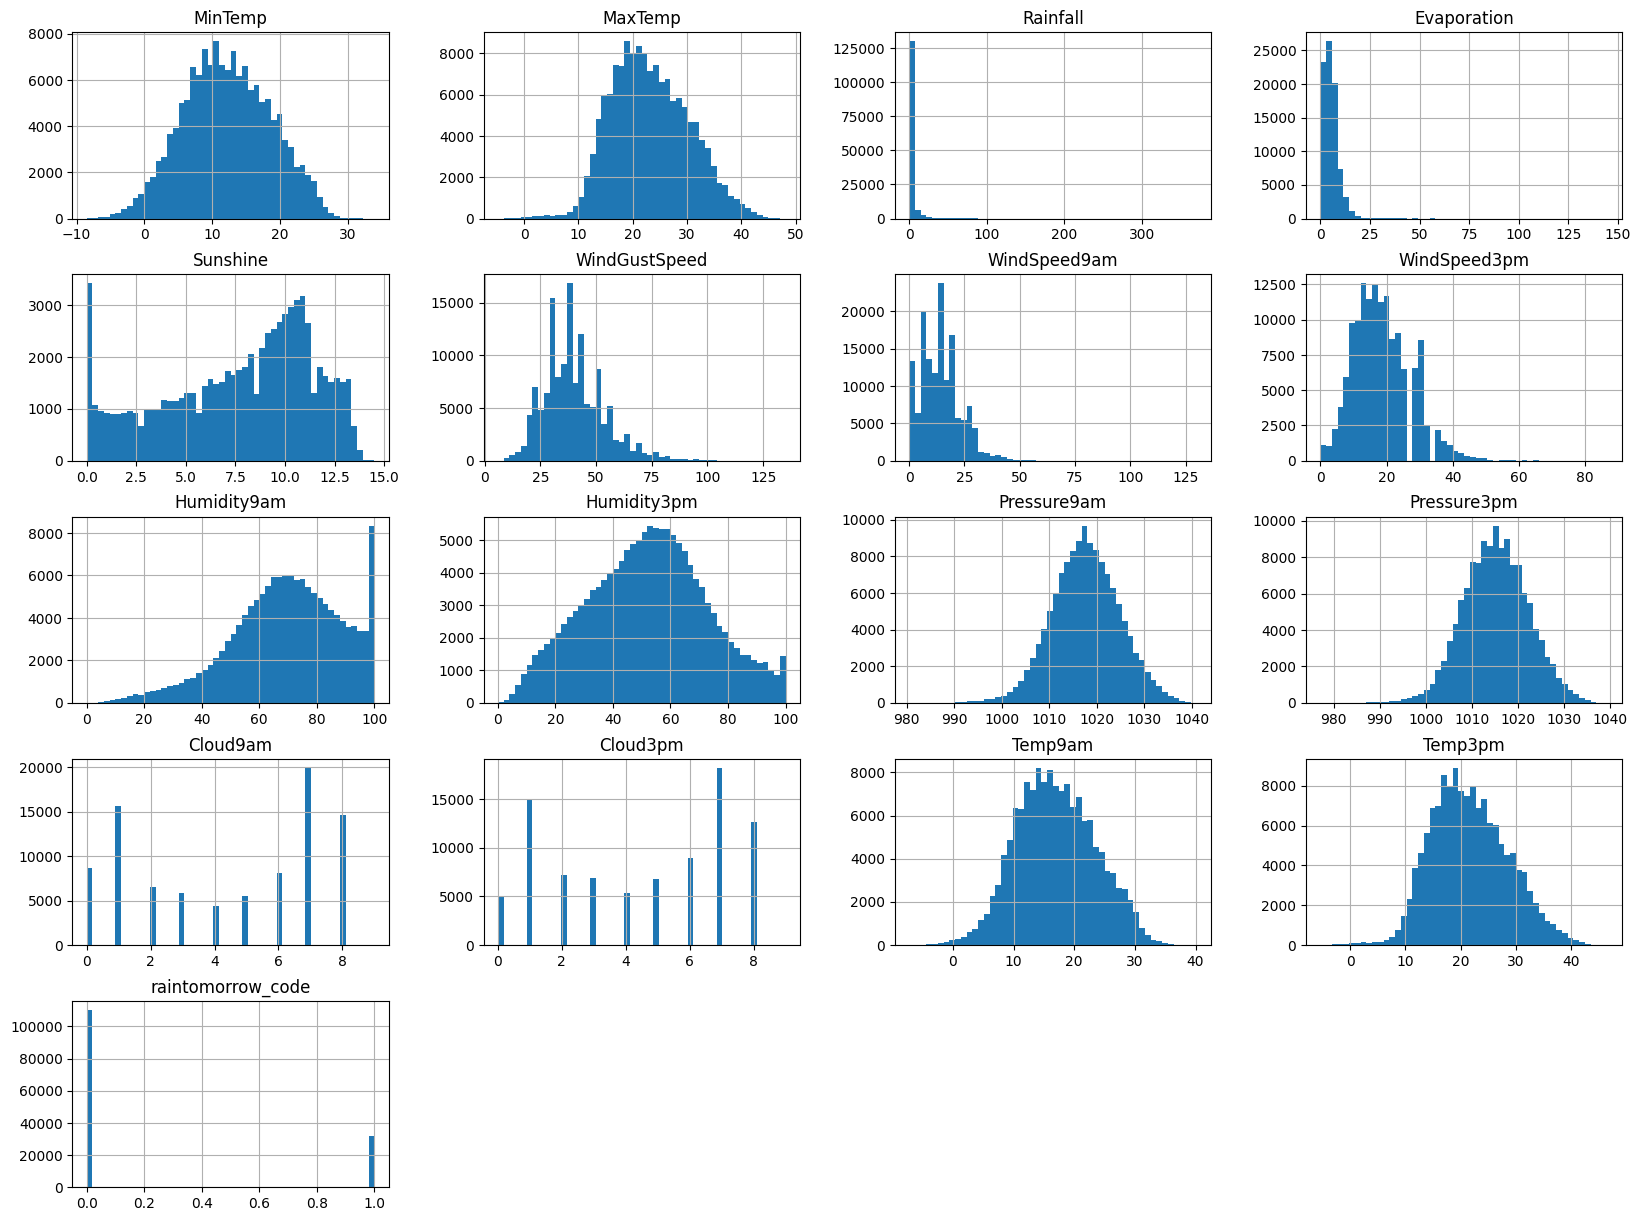

In [9]:
# !pip install matplotlib plotly seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
rainfall_df.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
rainfall_df.dropna(subset=["RainTomorrow","RainToday"],inplace=True)

In [11]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               140787 non-null  object 
 1   Location           140787 non-null  object 
 2   MinTemp            140319 non-null  float64
 3   MaxTemp            140480 non-null  float64
 4   Rainfall           140787 non-null  float64
 5   Evaporation        81093 non-null   float64
 6   Sunshine           73982 non-null   float64
 7   WindGustDir        131624 non-null  object 
 8   WindGustSpeed      131682 non-null  float64
 9   WindDir9am         131127 non-null  object 
 10  WindDir3pm         137117 non-null  object 
 11  WindSpeed9am       139732 non-null  float64
 12  WindSpeed3pm       138256 non-null  float64
 13  Humidity9am        139270 non-null  float64
 14  Humidity3pm        137286 non-null  float64
 15  Pressure9am        127044 non-null  float64
 16  Pressur

In [12]:
px.histogram(rainfall_df,x='WindDir9am',title="WindDir9am vs Rainy Days",color="RainToday")

In [13]:
px.histogram(rainfall_df,x='WindDir3pm',title="WindDir3pm vs Rainy Days",color="RainToday")

In [14]:
px.histogram(rainfall_df,x='Temp3pm',title="RainTomorrow vs Rainy Days",color="RainToday")

In [15]:
px.histogram(rainfall_df,x='RainTomorrow',title="RainTomorrow vs Rainy Days",color="RainToday")

In [16]:
px.histogram(rainfall_df,x='Location',title="Location vs Rainy Days",color="RainToday")

In [17]:
px.scatter(rainfall_df,x='MaxTemp',y='MinTemp',title="MinTemp vs MaxTemp",color="RainToday")

In [18]:
px.scatter(rainfall_df,x='Temp3pm',y='Humidity3pm',title="Temp3pm vs Humidity3pm",color="RainTomorrow")

In [19]:
len(rainfall_df.Location.unique())

49

In [20]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               140787 non-null  object 
 1   Location           140787 non-null  object 
 2   MinTemp            140319 non-null  float64
 3   MaxTemp            140480 non-null  float64
 4   Rainfall           140787 non-null  float64
 5   Evaporation        81093 non-null   float64
 6   Sunshine           73982 non-null   float64
 7   WindGustDir        131624 non-null  object 
 8   WindGustSpeed      131682 non-null  float64
 9   WindDir9am         131127 non-null  object 
 10  WindDir3pm         137117 non-null  object 
 11  WindSpeed9am       139732 non-null  float64
 12  WindSpeed3pm       138256 non-null  float64
 13  Humidity9am        139270 non-null  float64
 14  Humidity3pm        137286 non-null  float64
 15  Pressure9am        127044 non-null  float64
 16  Pressur

In [21]:
# fig=px.histogram(rainfall_df,)

In [22]:
# use_sample=True
# sample_fraction=0.1
# if use_sample:
#   rainfall_df=rainfall_df.sample(frac=sample_fraction).copy()
# used for large dataset size

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_val_df,test_df=train_test_split(rainfall_df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [25]:
train_df.shape

(84471, 24)

In [26]:
test_df.shape

(28158, 24)

In [27]:
val_df.shape

(28158, 24)

<Axes: title={'center': 'no of rows per year'}, xlabel='Date', ylabel='count'>

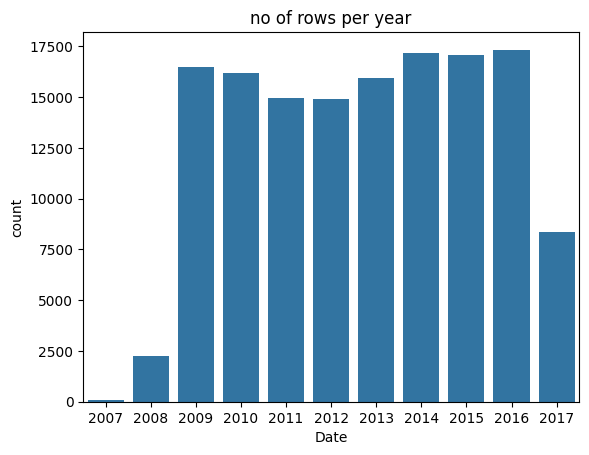

In [28]:
plt.title("no of rows per year")
sns.countplot(x=pd.to_datetime(rainfall_df.Date).dt.year)

In [29]:
year=pd.to_datetime(rainfall_df.Date).dt.year

In [30]:
train_df=rainfall_df[year<2015]
val_df=rainfall_df[year==2015]
test_df=rainfall_df[year>2015]

In [31]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        13.0   
144549       NaN          NE           31.0        ENE  ...         8.0   
144550       NaN         ESE           39.0        ESE  ...         8.0   
144551       NaN         ESE           43.0        ESE  ...         9.0   
144552       NaN         WNW           76.0        ENE  ...         9.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
144548       1014.1       1009.8       NaN       NaN     23.7     31.8   
144549       1012.6       1007.6       NaN       NaN     28.9     34.8   
144550       1011.9       1008.0       NaN       NaN     29.7     35.7   
144551       1014.0       1009.2       NaN       NaN     29.8     37.2   
144552       1012.1       1006.2       NaN       NaN     30.1     37.4   

        RainToday  RainTomorrow  raintomorrow_code  
0              No            No                0.0  
1              No            No                0.0  
2              No            No                0.0  
3              No            No                0.0  
4              No            No                0.0  
...           ...           ...                ...  
144548         No            No                0.0  
144549         No            No                0.0  
144550         No            No                0.0  
144551         No            No                0.0  
144552         No            No                0.0  

[97988 rows x 24 columns]

In [32]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
2133         NaN         WSW           30.0        ESE  ...        14.0   
2134         NaN          NE           56.0        ESE  ...        12.0   
2135         NaN         NNE           48.0         NE  ...        19.0   
2136         NaN         NNE           41.0        ESE  ...        37.0   
2137         NaN           E           33.0        SSE  ...        34.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        12.0   
144914       NaN         ESE           54.0          E  ...         7.0   
144915       NaN           E           56.0          E  ...         7.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        18.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2133         1013.5       1011.0       NaN       NaN     21.0     32.7   
2134         1016.0       1012.4       NaN       NaN     25.6     38.2   
2135         1017.9       1012.3       NaN       NaN     29.2     37.0   
2136         1013.6       1012.1       8.0       5.0     27.4     30.9   
2137         1017.4       1014.7       8.0       NaN     25.6     32.5   
...             ...          ...       ...       ...      ...      ...   
144913       1013.2       1010.1       NaN       NaN     24.3     33.0   
144914       1014.7       1010.9       NaN       NaN     26.7     35.0   
144915       1012.6       1007.5       NaN       NaN     28.1     34.7   
144916       1007.2       1002.6       NaN       1.0     31.3     38.4   
144917       1007.3       1003.7       NaN       NaN     25.8     35.8   

        RainToday  RainTomorrow  raintomorrow_code  
2133           No            No                0.0  
2134           No            No                0.0  
2135           No            No                0.0  
2136           No            No                0.0  
2137           No            No                0.0  
...           ...           ...                ...  
144913         No            No                0.0  
144914         No            No                0.0  
144915         No            No                0.0  
144916         No            No                0.0  
144917         No            No                0.0  

[17089 rows x 24 columns]

In [33]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
2498         NaN         ENE           54.0        NaN  ...        17.0   
2499         NaN         SSE           50.0        SSE  ...        30.0   
2500         NaN         ENE           48.0        ESE  ...        67.0   
2501         NaN         SSE           39.0         SE  ...        65.0   
2502         NaN         ENE           31.0         SE  ...        63.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        27.0   
145455       NaN           E           31.0         SE  ...        24.0   
145456       NaN         NNW           22.0         SE  ...        21.0   
145457       NaN           N           37.0         SE  ...        24.0   
145458       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2498         1013.4       1009.2       7.0       3.0     26.1     36.7   
2499         1011.1       1008.4       8.0       8.0     24.8     31.7   
2500         1014.0       1014.8       8.0       8.0     21.8     19.5   
2501         1017.9       1016.5       8.0       8.0     19.2     21.6   
2502         1016.3       1013.9       8.0       8.0     17.2     22.2   
...             ...          ...       ...       ...      ...      ...   
145454       1024.7       1021.2       NaN       NaN      9.4     20.9   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  raintomorrow_code  
2498           No            No                0.0  
2499           No           Yes                1.0  
2500          Yes           Yes                1.0  
2501          Yes           Yes                1.0  
2502          Yes            No                0.0  
...           ...           ...                ...  
145454         No            No                0.0  
145455         No            No                0.0  
145456         No            No                0.0  
145457         No            No                0.0  
145458         No            No                0.0  

[25710 rows x 24 columns]

In [34]:
input_cols=list(rainfall_df.columns[1:-2])
target_col="RainTomorrow"

In [35]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [36]:
target_col

'RainTomorrow'

In [37]:
train_inputs=train_df[input_cols]
train_target=train_df[target_col]

In [38]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [39]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [40]:
val_inputs=val_df[input_cols]
val_targets=val_df[target_col]
test_inputs=test_df[input_cols]
test_targets=test_df[target_col]

In [41]:
!pip install numpy

In [42]:
import numpy as np

In [43]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [44]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [45]:
train_inputs[categorical_cols].isna().sum()

Location          0
WindGustDir    6868
WindDir9am     7019
WindDir3pm     1952
RainToday         0
dtype: int64

In [46]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
144548     16.9     33.2       0.0          NaN       NaN           43.0   
144549     15.1     36.8       0.0          NaN       NaN           31.0   
144550     17.3     37.8       0.0          NaN       NaN           39.0   
144551     20.1     38.5       0.0          NaN       NaN           43.0   
144552     22.5     39.6       0.0          NaN       NaN           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1       8.0       NaN     16.9     21.8  
1            1007.8       NaN       NaN     17.2     24.3  
2            1008.7       NaN       2.0     21.0     23.2  
3            1012.8       NaN       NaN     18.1     26.5  
4            1006.0       7.0       8.0     17.8     29.7  
...             ...       ...       ...      ...      ...  
144548       1009.8       NaN       NaN     23.7     31.8  
144549       1007.6       NaN       NaN     28.9     34.8  
144550       1008.0       NaN       NaN     29.7     35.7  
144551       1009.2       NaN       NaN     29.8     37.2  
144552       1006.2       NaN       NaN     30.1     37.4  

[97988 rows x 16 columns]

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
imputer=SimpleImputer(strategy='mean')

In [49]:
imputer.fit(rainfall_df[numeric_cols])

SimpleImputer()

In [50]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

<ipython-input-50-235b1c3d6213>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-235b1c3d6213>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-235b1c3d6213>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
rainfall_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [52]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [53]:
val_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
train_df.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  raintomorrow_code  
count  97392.000000       97988.000000  
mean      21.540138           0.222456  
std        6.831612           0.415898  
min       -5.100000           0.000000  
25%       16.600000           0.000000  
50%       20.900000           0.000000  
75%       26.200000           0.000000  
max       46.100000           1.000000

In [56]:
scaler = MinMaxScaler()

In [57]:
scaler.fit(rainfall_df[numeric_cols])

MinMaxScaler()

In [58]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

<ipython-input-58-e9f917d767f4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-e9f917d767f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-e9f917d767f4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
print('Minimum:')
list(scaler.data_range_)

Minimum:


[np.float64(42.4),
 np.float64(52.9),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(129.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(60.5),
 np.float64(62.499999999999886),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(47.400000000000006),
 np.float64(52.1)]

In [60]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.7)]

In [61]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-61-a758576da409>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-a758576da409>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-a758576da409>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
rainfall_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [65]:
encoder.fit(rainfall_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [66]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [67]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [68]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-68-8950d7c1751d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-8950d7c1751d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-68-8950d7c1751d>:1: P

In [69]:
pd.set_option('display.max_columns', None)

In [70]:
train_targets=train_df[target_col]

In [71]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [72]:
!pip install pyarrow --quiet

In [73]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [74]:
# train_inputs = pd.read_parquet('train_inputs.parquet')
# val_inputs = pd.read_parquet('val_inputs.parquet')
# test_inputs = pd.read_parquet('test_inputs.parquet')

# train_targets = pd.read_parquet('train_targets.parquet')[target_col]
# val_targets = pd.read_parquet('val_targets.parquet')[target_col]
# test_targets = pd.read_parquet('test_targets.parquet')[target_col]


In [75]:
from sklearn.linear_model import LogisticRegression


In [76]:
model = LogisticRegression(solver='liblinear')

In [77]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [78]:
print(model.coef_.tolist())

[[0.8986324151652026, -2.8799288484272725, 3.1627783941533836, 0.854233199097419, -1.6713967645743446, 6.764401997617562, -0.9423193916231418, -1.4284332004350349, 0.32288705993860534, 5.995309618290915, 5.463842155596162, -9.17680276828724, -0.16230118601099724, 1.2876575875289866, 0.4747071394851873, 2.021436091461751, 0.6016503155225178, -0.5524816082098337, 0.4781437731763531, 0.007665268046942364, 0.34681451580237477, -0.35227817340007966, 0.179711399916397, 0.44048778217353635, -0.01398114695470229, 0.02894542200290951, 0.25814954936639495, -0.02120462546599252, -0.042796507118596186, -0.4831421250609206, -0.13756199126704258, -0.5760603459151452, -0.7875267102260608, -0.2554043193119793, -0.32888557652985945, -0.5690061685416732, 0.08183012548576335, 0.01337885424500912, 0.06412739003123773, -0.902055123317936, -0.44432923536376756, 0.008522707040877443, -0.46061421444037337, -0.46551869427571413, -0.06950053405236756, 0.19116044505301996, 0.45047653558120854, 0.6081202596542495

In [79]:
print(model.intercept_)

[-2.44956109]


In [80]:
print(model.intercept_)

[-2.44956109]


In [81]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [82]:
train_preds = model.predict(X_train)

In [83]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [84]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [85]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94401311, 0.05598689],
       [0.94074304, 0.05925696],
       [0.96093735, 0.03906265],
       ...,
       [0.98749147, 0.01250853],
       [0.98334725, 0.01665275],
       [0.87453712, 0.12546288]])

In [86]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(train_targets, train_preds)

0.8519206433440829

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [91]:
def predict_and_plot(inputs,targets,name=''):
  preds=model.predict(inputs)
  accuracy=accuracy_score(targets,preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))
  cf=confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name))
  return preds

Accuracy: 85.19%


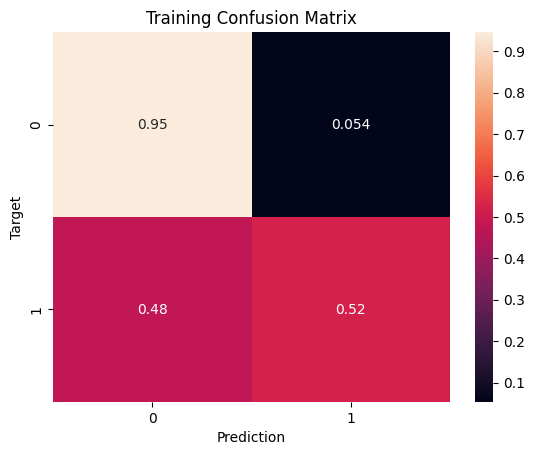

In [92]:
train_preds=predict_and_plot(X_train,train_targets,'Training')

Accuracy: 85.40%


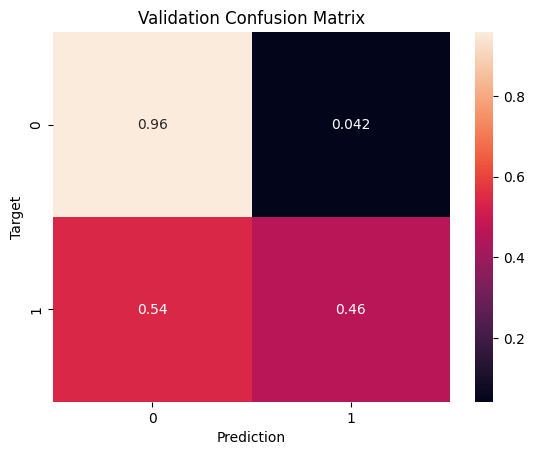

In [93]:
val_preds=predict_and_plot(X_val,val_targets,'Validation')

Accuracy: 84.20%


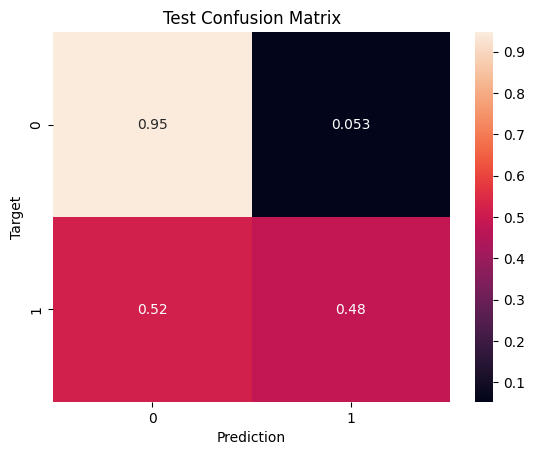

In [94]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [95]:
def random_guess(inputs):
  return np.random.choice(['No','Yes'],len(inputs))

In [96]:
def all_no(inputs):
  return np.full(len(inputs),'No')

In [97]:
accuracy_score(test_targets,random_guess(X_test))

0.5018669778296383

In [98]:
accuracy_score(test_targets,all_no(X_test))

0.7734344612991054

In [101]:
model1 = LogisticRegression(penalty='l1',tol=1e-4,solver='saga')

In [102]:
model1.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(penalty='l1', solver='saga')

In [103]:
def predict_and_plot1(inputs,targets,name=''):
  preds=model1.predict(inputs)
  accuracy=accuracy_score(targets,preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))
  cf=confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name))
  return preds

Accuracy: 85.22%


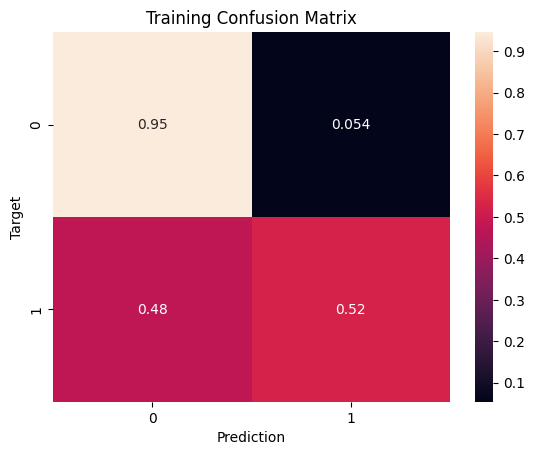

In [104]:
train_preds=predict_and_plot1(X_train,train_targets,'Training')

Accuracy: 85.39%


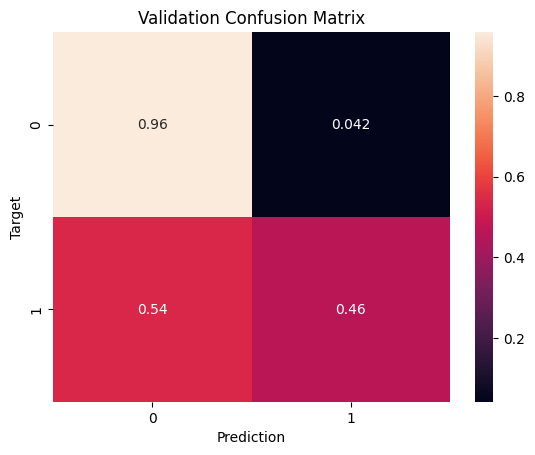

In [105]:
val_preds=predict_and_plot1(X_val,val_targets,'Validation')

Accuracy: 84.24%


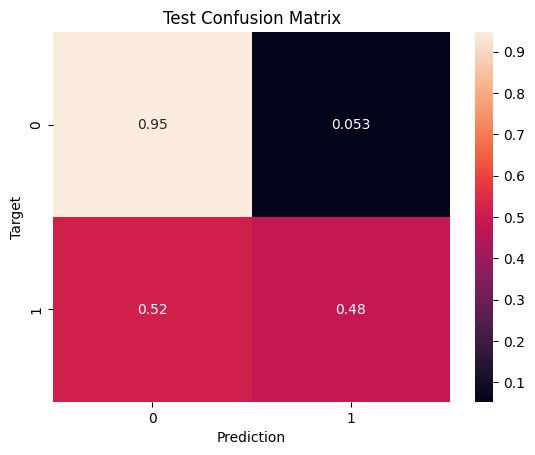

In [106]:
test_preds = predict_and_plot1(X_test, test_targets, 'Test')

In [110]:
model1 = LogisticRegression(penalty='elasticnet',tol=1e-4,solver='saga',l1_ratio=0.4)

In [111]:
model1.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(l1_ratio=0.4, penalty='elasticnet', solver='saga')

Accuracy: 85.20%


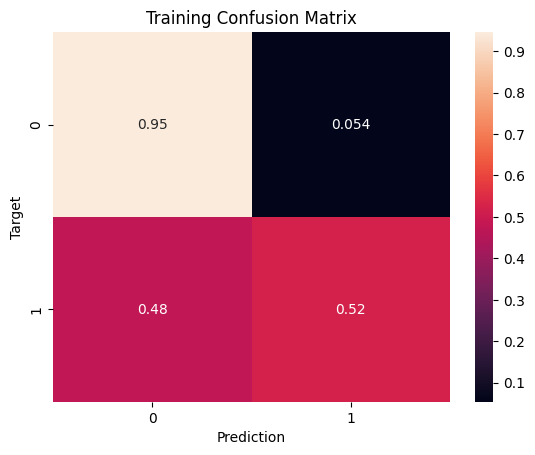

In [112]:
train_preds=predict_and_plot1(X_train,train_targets,'Training')

Accuracy: 85.42%


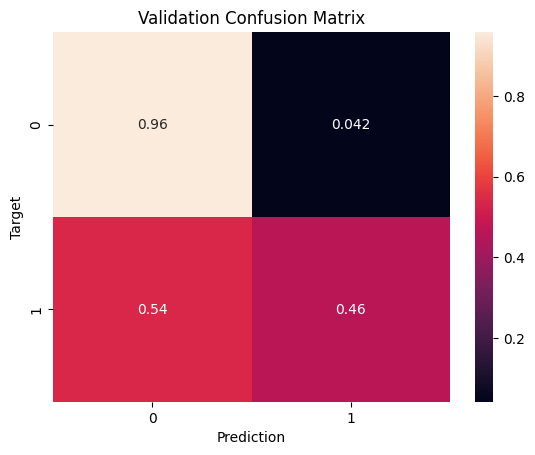

In [113]:
val_preds=predict_and_plot1(X_val,val_targets,'Validation')

Accuracy: 84.23%


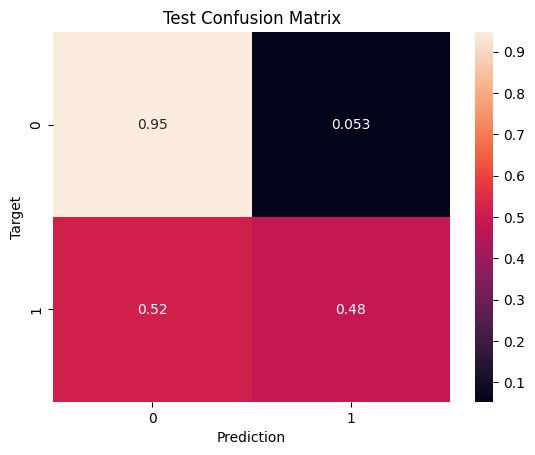

In [114]:
test_preds = predict_and_plot1(X_test, test_targets, 'Test')